In [1]:
# 📌 Cell 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

sns.set(style="whitegrid")


In [3]:
# 📌 Cell 2: Load the Dataset
df = pd.read_csv("data/customer_support_tickets.csv")
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,22-03-2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,01-06-2023 12:15,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,22-05-2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,01-06-2023 16:45,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,14-07-2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,01-06-2023 11:14,01-06-2023 18:05,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,13-11-2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,01-06-2023 07:29,01-06-2023 01:57,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,04-02-2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,01-06-2023 00:12,01-06-2023 19:53,1.0


In [33]:
# 📌 Cell 3: Print Column Names
print("Column Names:", df.columns.tolist())


Column Names: ['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']


In [34]:
# 📌 Cell 4: Basic Data Info
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [35]:
# 📌 Cell 5: Replace Inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

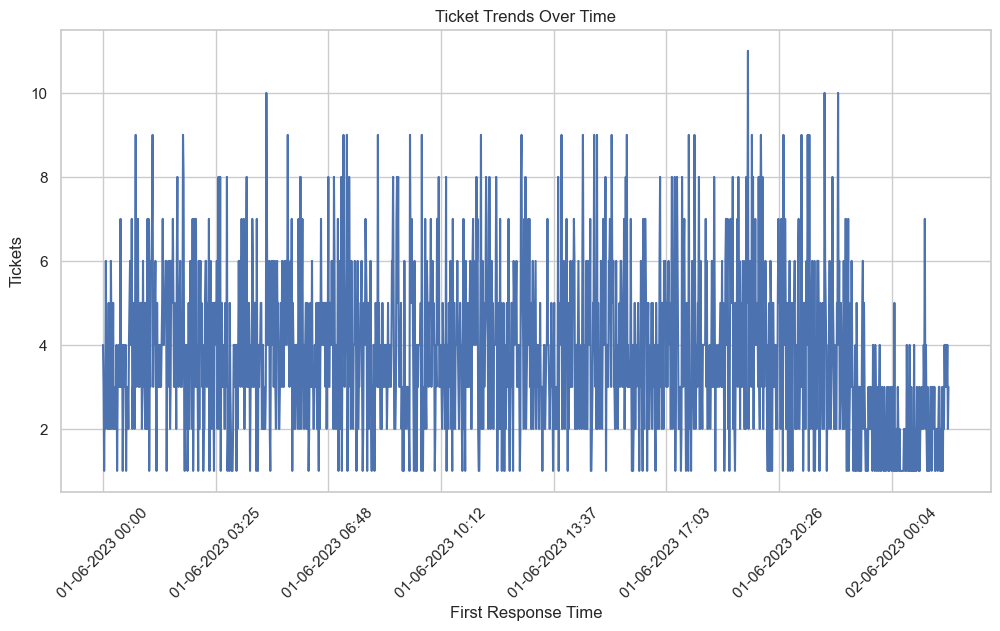

In [37]:
# 📌 Cell 6: Analyze Customer Support Ticket Trends
ticket_trends = df['First Response Time'].value_counts().sort_index()
ticket_trends.plot(kind='line', figsize=(12,6), title='Ticket Trends Over Time')
plt.xticks(rotation=45)
plt.ylabel("Tickets")
plt.show()

In [39]:
# 📌 Cell 7: Segment Customers by Age Group
bins = [0, 18, 30, 45, 60, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
df['age_group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)
df['age_group'].value_counts()


age_group
Middle Age     2459
Adult          2349
Young Adult    1928
Senior         1570
Teen            163
Name: count, dtype: int64

In [40]:
# 📌 Cell 8: Set Plotting Aesthetics
plt.rcParams["figure.figsize"] = (8, 6)
sns.set_palette("Set2")

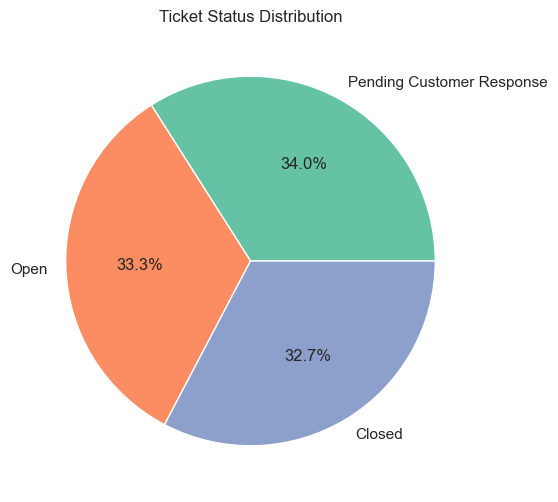

In [42]:
# 📌 Cell 9: Ticket Status Distribution (Pie Chart)
df['Ticket Status'].value_counts().plot.pie(autopct='%1.1f%%', title='Ticket Status Distribution')
plt.ylabel('')
plt.show()


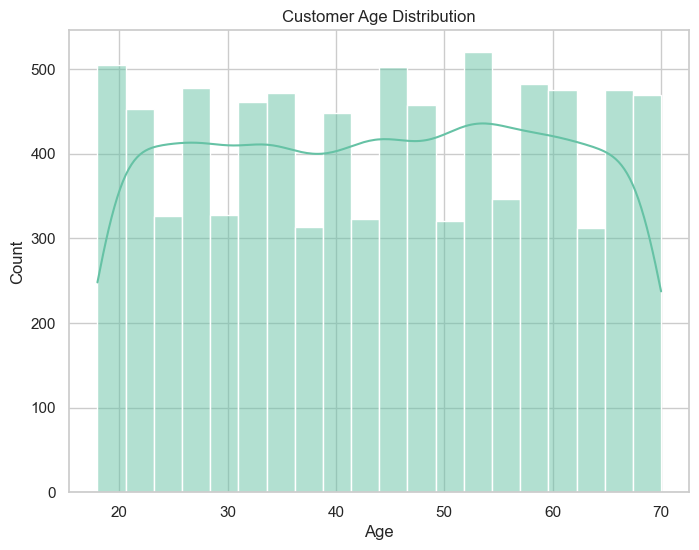

In [ ]:
# 📌 Cell 10: Customer Age Distribution (Histogram)
sns.histplot(df['Customer Age'], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.show()

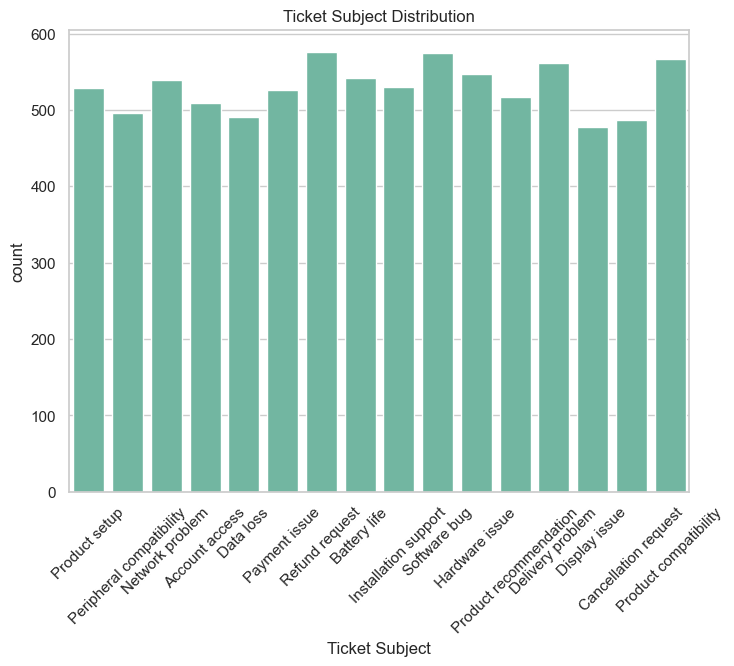

In [45]:
# 📌 Cell 12: Ticket Channel Distribution
sns.countplot(data=df, x='Ticket Subject')
plt.title("Ticket Subject Distribution")
plt.xticks(rotation=45)
plt.show()


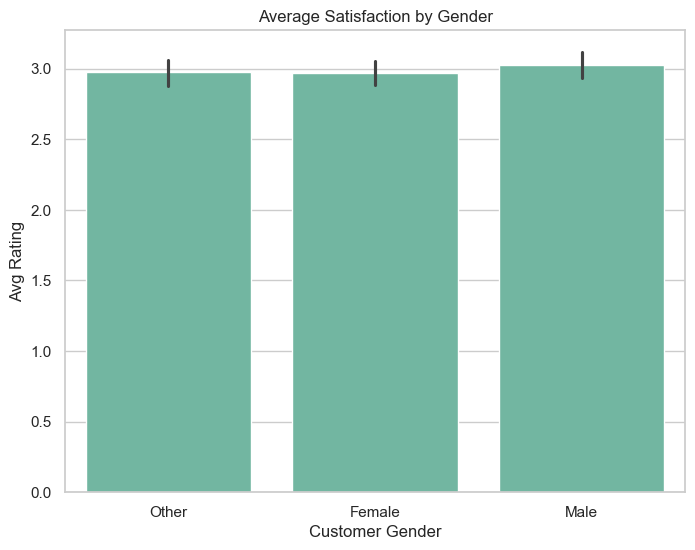

In [47]:
# 📌 Cell 13: Average Satisfaction by Gender (Bar Plot)
sns.barplot(data=df, x='Customer Gender', y='Customer Satisfaction Rating')
plt.title("Average Satisfaction by Gender")
plt.ylabel("Avg Rating")
plt.show()


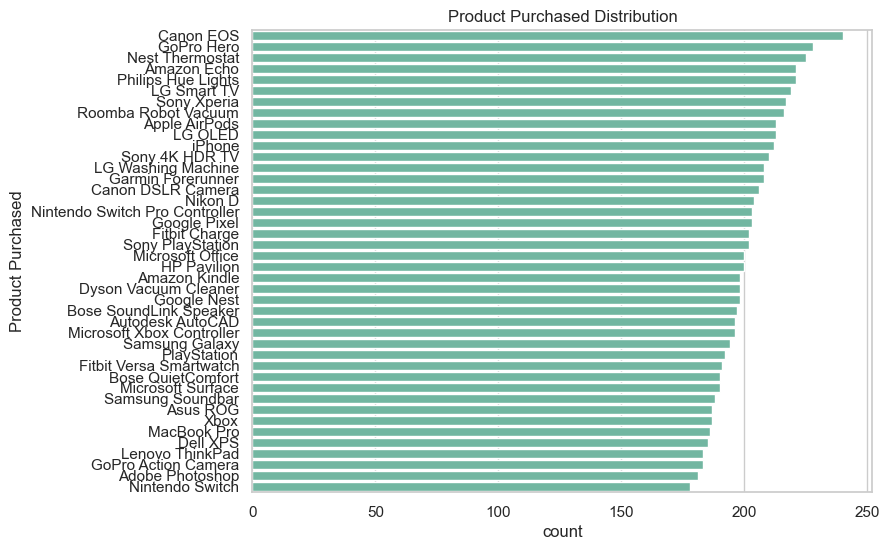

In [49]:
# 📌 Cell 14: Product Purchased Distribution
sns.countplot(data=df, y='Product Purchased', order=df['Product Purchased'].value_counts().index)
plt.title("Product Purchased Distribution")
plt.show()


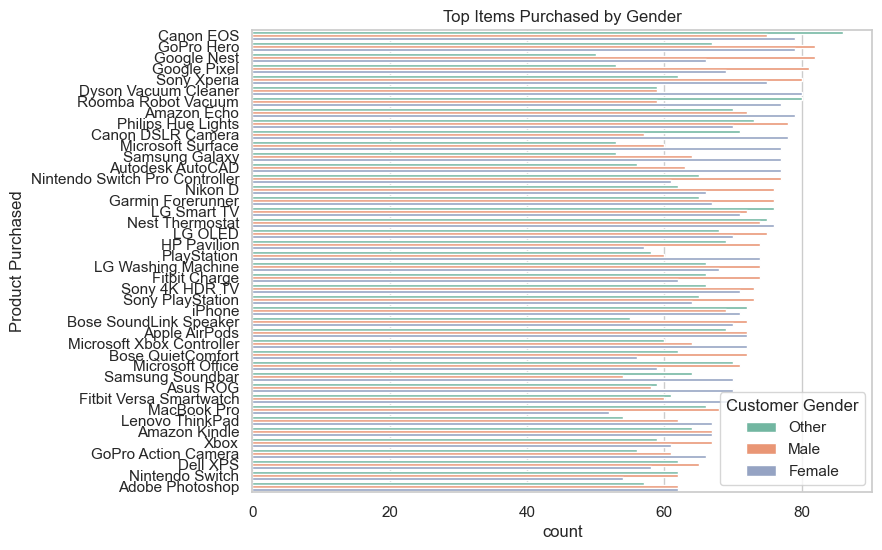

In [50]:
# 📌 Cell 15: Top Items Purchased by Gender (Horizontal Bar Chart)
top_items = df.groupby(['Customer Gender', 'Product Purchased']).size().reset_index(name='count')
top_items = top_items.sort_values(by='count', ascending=False)
sns.barplot(data=top_items, y='Product Purchased', x='count', hue='Customer Gender')
plt.title("Top Items Purchased by Gender")
plt.show()


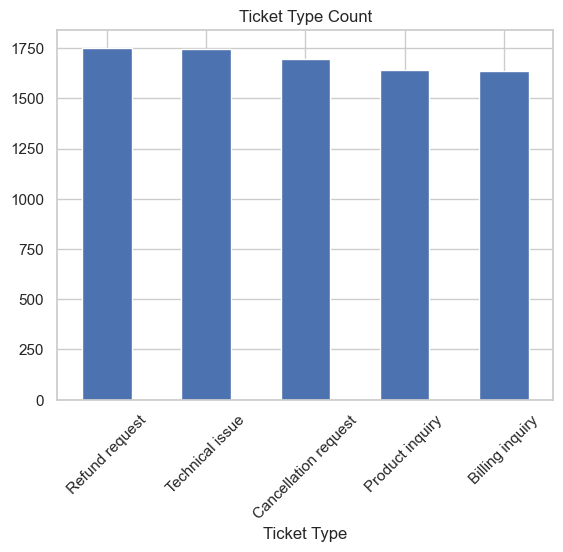

In [6]:
# 📌 Cell 16: Count Ticket Types
df['Ticket Type'].value_counts().plot(kind='bar', title='Ticket Type Count')
plt.xticks(rotation=45)
plt.show()


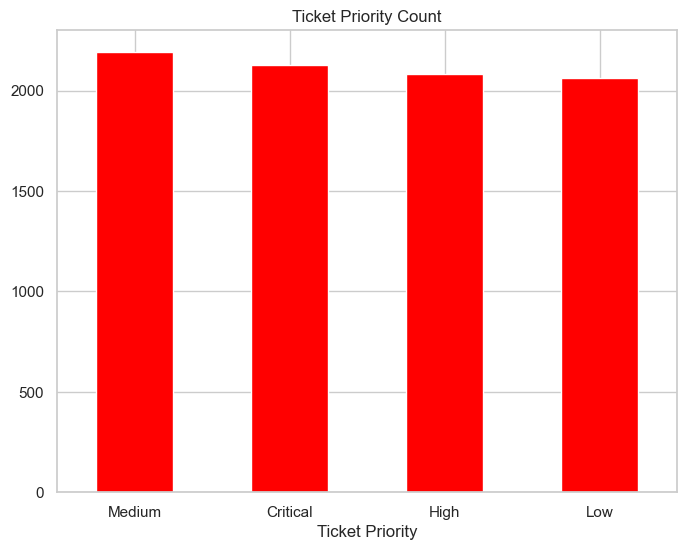

In [53]:
# 📌 Cell 17: Count Ticket Priorities
df['Ticket Priority'].value_counts().plot(kind='bar', title='Ticket Priority Count', color='Red')
plt.xticks(rotation=0)
plt.show()


In [76]:
# 📌 Cell 18: Label Encoding for ML
label_cols = ['Customer Gender', 'Ticket Status', 'Ticket Priority', 'Ticket Channel', 'Product Purchased']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))



In [78]:
# 📌 Cell 19: Define Features and Target
features = ['Customer Age', 'Customer Gender', 'Ticket Priority', 'Ticket Channel', 'Product Purchased']
target = 'Customer Satisfaction Rating'
df = df.dropna(subset=features + [target])
X = df[features]
y = df[target]


In [79]:
# 📌 Cell 20: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
# 📌 Cell 21: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [81]:
# 📌 Cell 22: Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.2075812274368231

Classification Report:
               precision    recall  f1-score   support

         1.0       0.23      0.22      0.22       109
         2.0       0.21      0.21      0.21       117
         3.0       0.17      0.20      0.18       112
         4.0       0.23      0.23      0.23       108
         5.0       0.20      0.19      0.19       108

    accuracy                           0.21       554
   macro avg       0.21      0.21      0.21       554
weighted avg       0.21      0.21      0.21       554



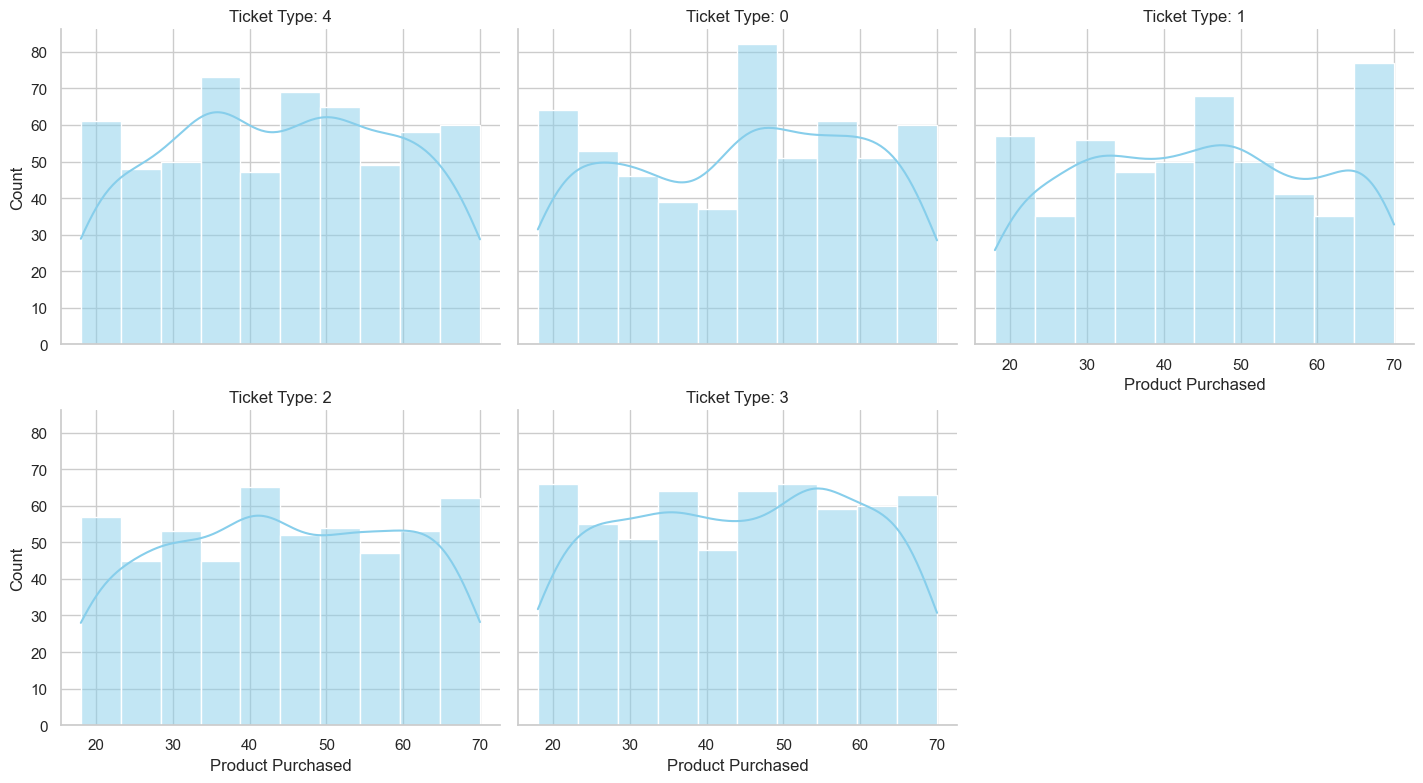

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Ensure Ticket Type is a string for better labeling
df['Ticket Type'] = df['Ticket Type'].astype(str)

# Create a FacetGrid of age distribution per ticket type
g = sns.FacetGrid(df, col="Ticket Type", col_wrap=3, height=4, aspect=1.2)
g.map_dataframe(sns.histplot, x="Customer Age", bins=10, kde=True, color='skyblue')

# Set overall title and individual axes labels
g.set_axis_labels("Product Purchased", "Count")
g.set_titles(col_template="Ticket Type: {col_name}")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
